In [58]:
import numpy as np
import pandas as pd
from nbodykit.source.catalog import CSVCatalog, BinaryCatalog
from nbodykit.algorithms.pair_counters import SimulationBoxPairCount
from nbodykit.lab import UniformCatalog
import matplotlib.pyplot as plt

# Own functions 

In [59]:
def graphFunction(x,y, color=["purple","blue"], labels=["x","y"], titulo="", scatter=False, corte=[0,-1], limite=[]):
    '''
    Descripción: Función que grafica y con respecto a x
    IN = {
        x: Variable independiente.
        y: Variable dependiente.
        color: El color de la gráfica.
        labels: El nombre de las variables.
        titulo: El título
        scatter: Si es que se quieren resaltar los puntos
    }
    Out: Una bonita gráfica x-y
    '''
    # Creamos el objeto figura y nuestro ax.
    fig, ax = plt.subplots(figsize = (5, 3))
    # ponemos título
    ax.set_title(titulo)
    # Graficamos
    if scatter:
        ax.scatter(x[corte[0]:corte[1]],y[corte[0]:corte[1]], marker='.', c=color[0])
    ax.plot(x[corte[0]:corte[1]], y[corte[0]:corte[1]], color=color[1]) # Graficamos
    ax.set_xlabel(labels[0]) # Asignamos nombres a los labels
    ax.set_ylabel(labels[1]) # Asignamos nombres a los labels
    if limite != []:
        plt.ylim(top = max(limite), bottom= min(limite))
    ax.grid() # Con cuadrícula

# Algorithms 

In [60]:
# Reading nada 
data = np.load("./data/nmpy/prueba_20k.npy")
data = pd.DataFrame(data)
data.to_csv("./data/prueba_20k.csv", index=False)

In [61]:
columns = ["x", "y", "z"]
# read the data
f = CSVCatalog('./data/prueba_20k.csv', names=columns, sep=",")

# combine x, y, z to Position
f['Position'] = f['x'][:, None] * [1, 0, 0] + f['y'][:, None] * [0, 1, 0] + f['z'][:, None] * [0, 0, 1]
print(f)

CSVCatalog(size=20001, FileStack(CSVFile(path=/work/dpsbb/codes/01-Correlation_and_PowerSpectrum_Of_Real_Data/data/prueba_20k.csv, dataset=*, ncolumns=3, shape=(20001,)>, ... 1 files))


In [63]:
# Create a cube
randomCat = UniformCatalog(nbar=512/20000, BoxSize=512)

In [64]:
l = 120.
n_bins = 30
bins = np.array([(x+1)*(l)/n_bins for x in range(n_bins+1)])
corr = SimulationBoxPairCount(mode="1d", first=f, show_progress=True, edges= bins, BoxSize=512., second=randomCat)

In [65]:
corr.attrs

{'mode': '1d',
 'edges': array([  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,  44.,
         48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,  88.,
         92.,  96., 100., 104., 108., 112., 116., 120., 124.]),
 'Nmu': None,
 'pimax': None,
 'show_progress': True,
 'N1': 20001,
 'N2': 3437524,
 'total_wnpairs': 34376958762.0,
 'is_cross': True,
 'BoxSize': array([512., 512., 512.]),
 'periodic': True,
 'weight': 'Weight',
 'position': 'Position',
 'config': {},
 'los': 2}

In [66]:
print(corr.pairs.variables)
print(corr.pairs["npairs"])
print(corr.pairs["wnpairs"])
print(corr.pairs["r"])

['r', 'npairs', 'wnpairs']
[   963336   2607329   5080908   8383570  12496286  17444196  23214533
  29811520  37212266  45452069  54517790  64408897  75094038  86648378
  98990029 112203195 126188130 141013208 156662738 173166396 190464403
 208593002 227519594 247334629 267942580 289340433 311608893 334702638
 358572227 383247551]
[9.63336000e+05 2.60732900e+06 5.08090800e+06 8.38357000e+06
 1.24962860e+07 1.74441960e+07 2.32145330e+07 2.98115200e+07
 3.72122660e+07 4.54520690e+07 5.45177900e+07 6.44088970e+07
 7.50940380e+07 8.66483780e+07 9.89900290e+07 1.12203195e+08
 1.26188130e+08 1.41013208e+08 1.56662738e+08 1.73166396e+08
 1.90464403e+08 2.08593002e+08 2.27519594e+08 2.47334629e+08
 2.67942580e+08 2.89340433e+08 3.11608893e+08 3.34702638e+08
 3.58572227e+08 3.83247551e+08]
[  6.42911227  10.26431475  14.18988748  18.14720641  22.12025405
  26.10245206  30.08869524  34.07857296  38.07005193  42.0636441
  46.0577786   50.05314263  54.04922456  58.04594798  62.04323376
  66.040154

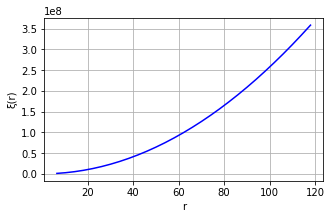

In [70]:
graphFunction(corr.pairs["r"], corr.pairs["npairs"], labels=["r", "ξ(r)"])